# Nicolás Torres-Echeverry: Week 4 - Classification

This week, we shift from gathering human textual classifications through crowdsourcing, to using machine learning models and algorithms that train on those human classifications and extend them to documents far too numerous to read. If you recall, *clustering* allows us to stably partition text data (e.g., documents, turns of conversation) according to all patterns of covariation among available text features. *Classification*, by contrast, partitions text data according to only those features and their variation that enable us to mimic and extrapolate human annotations.

In this notebook, we will show how to use a variety of classification methods, including **Naïve Bayes**, **Logistic regression**, **K-nearest neighbor**, **decision trees and random forests**, **support vector machines** and even a **simple neural network**, the perceptron. We will also demonstrate **ensemble techniques that can link several such methods into a single, more accurate, classification pipeline**. We will finally learn to use conventions and metrics to evaluate classifier performance on out-of-sample data. 

For this notebook we will be using the following packages.

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

# Simple Simulated Examples

Here we create a sandbox for you to explore different types of classified data and how different statistical classifiers perform on each type.

## Generating example data

We start by loading one of the "cartoon" or simplified data sets and then dividing it into training and testing sets. To maximize our ability to visualize, each dataset involves two classes, colored yellow and blue, arrayed along two dimensions (`x` and `y`). 

The four data patterns include: 
+ `random` in which the two classes are randomly distributed across both dimensions
+ `andSplit` in which the two classes are linearly split along one of two dimensions (e.g., men like Adidas)
+ `xorSplit` in which the two classes are split, oppositely, along each dimension (e.g., old ladies and young men like Nikes)
+ `targetSplit` in which one class is nested within the other in two dimensions (e.g., middle aged, middle income people like vintage Mustangs)
+ `multiBlobs` in which 5 classes are placed as bivariate Gaussians at random locations

***`noise` is a variable [0-1] that ranges from no noise in the prescribed pattern [0] to complete noise/randomness [1].***

Uncomment (remove the # in front of) each dataset, one at a time, and then run the cell and subsequent cells to examine how each machine learning approach captures each pattern.

In [12]:
noise = .2

#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.random())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise))
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise)) #Please try this one
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise))
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise))

We can easily visualize the rendered datasets because they are generated in two dimensions.

Let's see what dfTrain, a simulated data that we just made, looks like

In [13]:
dfTrain

,vect,category
537,"[-2.302981233392716, 4.877146159777835]",2
229,"[-6.938909054790674, 6.361925767407655]",0
667,"[-5.432469252602839, 7.488568228439141]",1
1111,"[-5.422322719244898, 7.780874878880586]",0
2480,"[-7.979817532184782, -1.6262253659478068]",4
...,...,...
668,"[0.930617635487037, -5.537390793600964]",3
1524,"[-7.675061788866636, -2.384328189906805]",4
1929,"[-5.1707921024052625, 7.592901526798236]",2
131,"[-5.935788778270944, 7.981381043356079]",0


So, dfTrain has two columns, vect and category. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

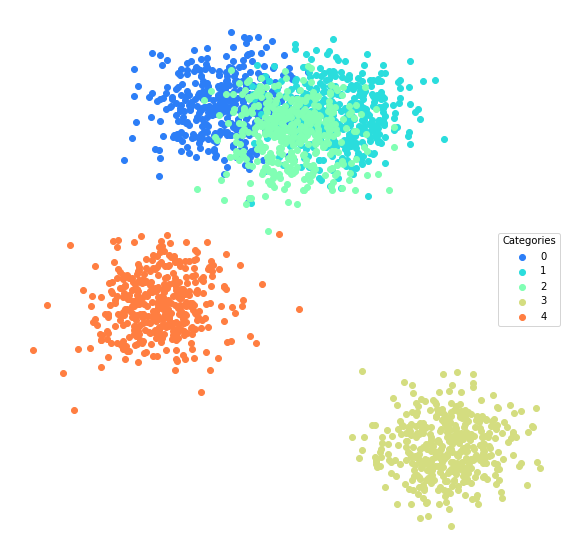

In [14]:
lucem_illud.plotter(dfTrain)

## Training a Machine Learning algorithm

We can now pick a model, there are many more options in `scikit-learn`. These are just a few examples, which array along the machine learning "tribes" described in Pedro Domingos _The Master Algorithm_.

Uncomment (remove the # in front of) each algorithm one at a time, then run the cell and subsequent cells to evaluate how it learns to understand the data.

In [15]:
    #Bayes
#clf = sklearn.naive_bayes.GaussianNB()

    #Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

    #Classical Regression - LogitRegression
#clf = sklearn.linear_model.LogisticRegression()

    #Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

    #Connectionists
#clf = sklearn.neural_network.MLPClassifier()

    #Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

We're using sklearn here. What is sklearn? It's an open source machine learning library for Python. We use sklearn because it features various machine learning algorithms and it works well with NumPy library. You don't need to understand the sklearn package in detail for the moment, but let's see what methods and attributes sklearn has, because we're going to use some of them:

In [16]:
dir(sklearn)

['__SKLEARN_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__check_build',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_distributor_init',
 '_loss',
 'base',
 'clone',
 'config_context',
 'datasets',
 'decomposition',
 'dummy',
 'ensemble',
 'exceptions',
 'externals',
 'feature_extraction',
 'get_config',
 'linear_model',
 'logger',
 'logging',
 'metrics',
 'model_selection',
 'naive_bayes',
 'neighbors',
 'neural_network',
 'os',
 'preprocessing',
 'random',
 'set_config',
 'setup_module',
 'show_versions',
 'svm',
 'sys',
 'tree',
 'utils']

Now we fit the model by giving it our training data

In [17]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

KNeighborsClassifier(weights='distance')

Here, "stack" function is used. Why did we use stack function here? This is because dfTrain['vect'] is a sequence, while clf.fit() takes an array element. Let's see what dfTrain['vect'] looks like:

In [18]:
dfTrain['vect']

537       [-2.302981233392716, 4.877146159777835]
229       [-6.938909054790674, 6.361925767407655]
667       [-5.432469252602839, 7.488568228439141]
1111      [-5.422322719244898, 7.780874878880586]
2480    [-7.979817532184782, -1.6262253659478068]
                          ...                    
668       [0.930617635487037, -5.537390793600964]
1524     [-7.675061788866636, -2.384328189906805]
1929     [-5.1707921024052625, 7.592901526798236]
131       [-5.935788778270944, 7.981381043356079]
585      [-2.5492427397402526, 5.758092159502074]
Name: vect, Length: 2000, dtype: object

And let's see what np.stack(dfTrain['vect']) does:

In [19]:
np.stack(dfTrain['vect'])

array([[-2.30298123,  4.87714616],
       [-6.93890905,  6.36192577],
       [-5.43246925,  7.48856823],
       ...,
       [-5.1707921 ,  7.59290153],
       [-5.93578878,  7.98138104],
       [-2.54924274,  5.75809216]])

As you can see, stack function takes a sequence of arrays (which have the same shape) and joins them along a new axis.

## Algorithm evaluation

We can look at few measurements of each classifier's performance by using the testing set

In [20]:
lucem_illud.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.070,0.899087,0.822430,0.727902,0.846154
1,0.118,0.812325,0.704082,0.550724,0.696970
2,0.172,0.729547,0.575758,0.412932,0.564356
3,0.000,1.000000,1.000000,1.000000,1.000000
4,0.000,1.000000,1.000000,1.000000,1.000000


This lets us look at which classes do better:

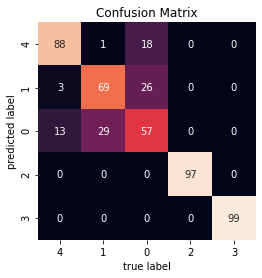

In [21]:
lucem_illud.plotConfusionMatrix(clf, dfTest)

The greater the area under the curve the better.

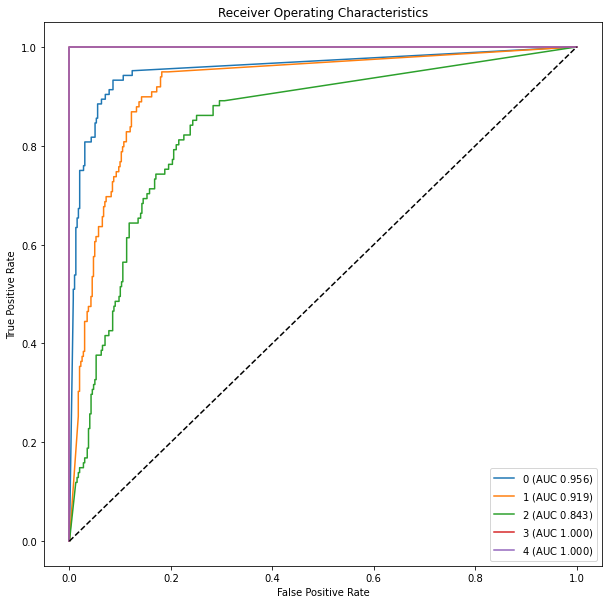

In [22]:
lucem_illud.plotMultiROC(clf, dfTest)

We can also look at the regions the classifer identifies as one class or the other:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

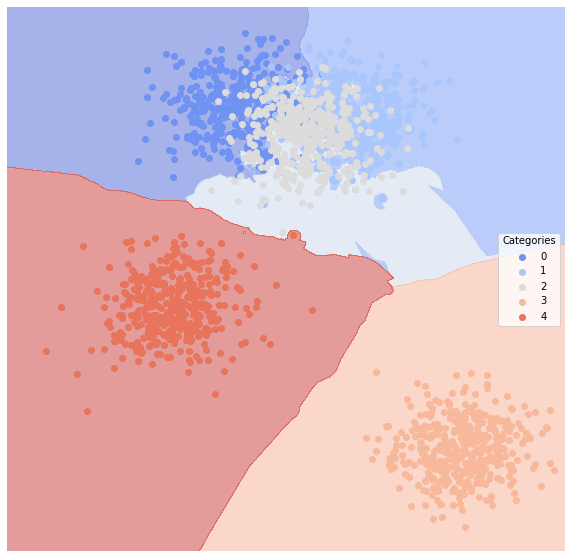

In [23]:
lucem_illud.plotregions(clf, dfTrain)

## Now we do the same for real data

Available data sets include:
+ Reddit threads "classified" by thread topic
+ 20 newsgroups "classified" by group topic
+ Senate press releases "classified" by Senator (2 senators)
+ Senate press releases "classified" by Senator (5 senators)
+ Emails classified as Spam or Ham

In [74]:
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadReddit())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadNewsGroups())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSenateSmall())
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSenateLarge())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSpam())

Loading senator: Klobuchar
Loading senator: Kyl
Loading senator: Kerry
Loading senator: Kohl
Loading senator: Kennedy
Converting to vectors


In [79]:
#Bayes
#clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up, but lose ROC
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

In [80]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

SVC(kernel='linear', probability=True)

In [81]:
lucem_illud.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Kyl,0.001282,0.994898,1.000000,0.991078,0.989796
Klobuchar,0.005128,0.971014,1.000000,0.947157,0.942029
Kennedy,0.023077,0.977211,0.968750,0.958238,0.979885
Kerry,0.024359,0.971248,0.937824,0.911879,0.962766
Kohl,0.005128,0.974026,1.000000,0.953180,0.948052


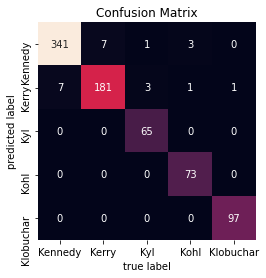

In [82]:
lucem_illud.plotConfusionMatrix(clf, dfTest)

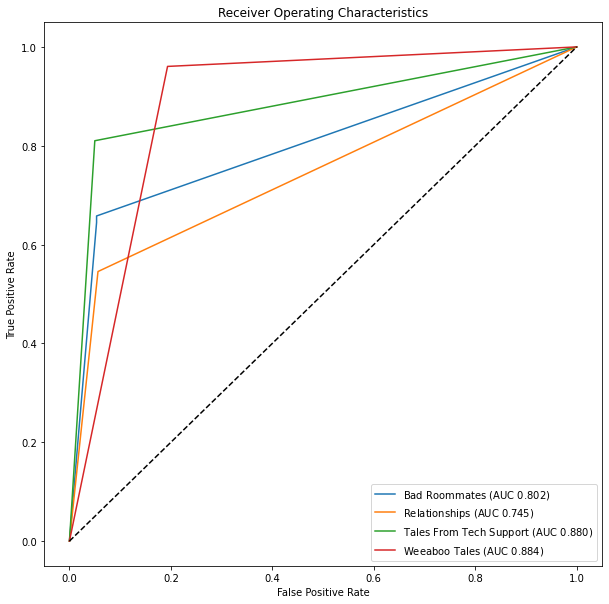

In [30]:
lucem_illud.plotMultiROC(clf, dfTest)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

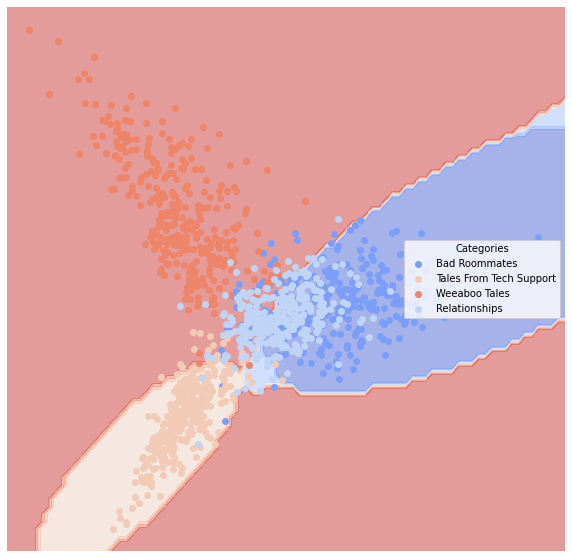

In [31]:
lucem_illud.plotregions(clf, dfTrain)

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

# A. ***Using randomly created data***

In [32]:
noise2 = .3

dfTrain_1, dfTest_1 = lucem_illud.trainTestSplit(lucem_illud.random())
dfTrain_2, dfTest_2 = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise2))
dfTrain_3, dfTest_3 = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise2))
dfTrain_4, dfTest_4 = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise2))
dfTrain_5, dfTest_5 = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise2))

In [33]:
noise2 = .4

dfTrain_6, dfTest_6 = lucem_illud.trainTestSplit(lucem_illud.random())
dfTrain_7, dfTest_7 = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise2))
dfTrain_8, dfTest_8 = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise2))
dfTrain_9, dfTest_9 = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise2))
dfTrain_10, dfTest_10 = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise2))

In [57]:
# Only data created through multiblobs creates nonbinary categories

# train_data = [dfTrain_1, dfTrain_2, dfTrain_3, dfTrain_4, dfTrain_5, dfTrain_6,
#              dfTrain_7, dfTrain_8, dfTrain_9, dfTrain_10] 
             
# for data in train_data:
    # print(data['category'].describe())

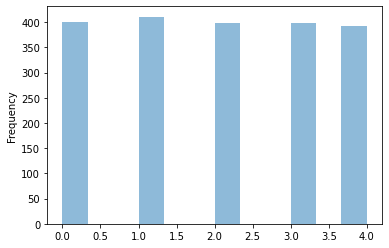

In [55]:
ax = dfTrain_10['category'].plot.hist(bins=12, alpha=0.5)

In [100]:
dfTrain_10.sample(5)

,vect,category
2146,"[2.8861528093031232, -4.147953136974566]",4
1043,"[-1.3279436577464716, -10.60261069962547]",2
884,"[2.501779680716564, -3.5225530292400515]",4
247,"[1.2596643975386541, -2.3007030635586645]",4
795,"[-1.6183265235622342, -1.505419109916386]",0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

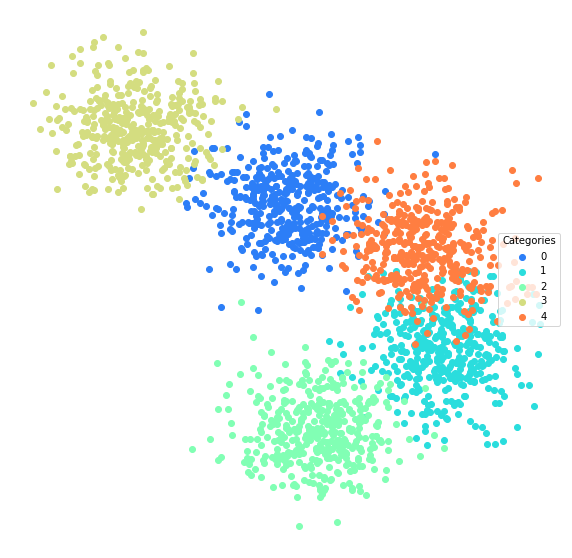

In [60]:
lucem_illud.plotter(dfTrain_10)

In [56]:
    #Bayes
clf_naive_bayes = sklearn.naive_bayes.GaussianNB()

    #Analogizes
clf_linear = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
clf_svc = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
clf_kneigh = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

    #Classical Regression - Logit Regression
clf_logit = sklearn.linear_model.LogisticRegression()

    #Symbolists
clf_dtree = sklearn.tree.DecisionTreeClassifier()
clf_randomf = sklearn.ensemble.RandomForestClassifier()

    #Connectionists
clf_neural = sklearn.neural_network.MLPClassifier()

    #Ensemble
clf_gradient = sklearn.ensemble.GradientBoostingClassifier()

In [58]:
    # Naive Bayes
clf_naive_bayes.fit(np.stack(dfTrain_10['vect'], axis=0), dfTrain_10['category'])
lucem_illud.evaluateClassifier(clf_naive_bayes, dfTest_10)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.022,0.967266,0.940000,0.902525,0.949495
1,0.050,0.916769,0.855556,0.764200,0.865169
2,0.004,0.990196,1.000000,0.984392,0.980392
3,0.008,0.987684,0.980392,0.965169,0.980392
4,0.060,0.911423,0.861111,0.771512,0.861111


In [61]:
    # Analogizes
    # Linear
clf_linear.fit(np.stack(dfTrain_10['vect'], axis=0), dfTrain_10['category'])
lucem_illud.evaluateClassifier(clf_linear, dfTest_10)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.020,0.972317,0.940594,0.910590,0.959596
1,0.056,0.904317,0.842697,0.738138,0.842697
2,0.004,0.990196,1.000000,0.984392,0.980392
3,0.006,0.988940,0.990099,0.974685,0.980392
4,0.066,0.904242,0.844037,0.750994,0.851852


In [63]:
    # SVC
clf_svc.fit(np.stack(dfTrain_10['vect'], axis=0), dfTrain_10['category'])
lucem_illud.evaluateClassifier(clf_svc, dfTest_10)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.052,0.963777,0.796748,0.790700,0.989899
1,0.056,0.899915,0.850575,0.737219,0.831461
2,0.004,0.990196,1.000000,0.984392,0.980392
3,0.006,0.988940,0.990099,0.974685,0.980392
4,0.094,0.829365,0.842697,0.651206,0.694444


In [64]:
    # KNeighbors
clf_kneigh.fit(np.stack(dfTrain_10['vect'], axis=0), dfTrain_10['category'])
lucem_illud.evaluateClassifier(clf_kneigh, dfTest_10)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.024,0.966019,0.930693,0.893688,0.949495
1,0.058,0.903100,0.833333,0.730247,0.842697
2,0.006,0.985294,1.000000,0.976588,0.970588
3,0.010,0.982782,0.980198,0.957369,0.970588
4,0.066,0.904242,0.844037,0.750994,0.851852


In [66]:
    # Symbolists
    # Decision Tree
clf_dtree.fit(np.stack(dfTrain_10['vect'], axis=0), dfTrain_10['category'])
lucem_illud.evaluateClassifier(clf_dtree, dfTest_10)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.040,0.933222,0.907216,0.828415,0.888889
1,0.066,0.893833,0.804348,0.698784,0.831461
2,0.012,0.977880,0.980000,0.949569,0.960784
3,0.012,0.977880,0.980000,0.949569,0.960784
4,0.082,0.883976,0.801802,0.698744,0.824074


In [67]:
    # Random Forest
clf_randomf.fit(np.stack(dfTrain_10['vect'], axis=0), dfTrain_10['category'])
lucem_illud.evaluateClassifier(clf_randomf, dfTest_10)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.022,0.963463,0.948980,0.903466,0.939394
1,0.060,0.901884,0.824176,0.722530,0.842697
2,0.008,0.980392,1.000000,0.968784,0.960784
3,0.010,0.986427,0.970874,0.955837,0.980392
4,0.064,0.908872,0.845455,0.758030,0.861111


In [68]:
    # Connectionists - Neural Network
clf_neural.fit(np.stack(dfTrain_10['vect'], axis=0), dfTrain_10['category'])
lucem_illud.evaluateClassifier(clf_neural, dfTest_10)

/Users/nte/Documents/CCA2021/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.020,0.972317,0.940594,0.910590,0.959596
1,0.050,0.916769,0.855556,0.764200,0.865169
2,0.010,0.986427,0.970874,0.955837,0.980392
3,0.006,0.988940,0.990099,0.974685,0.980392
4,0.058,0.909344,0.876190,0.778384,0.851852


In [69]:
    # Ensemble - Gradient
clf_gradient.fit(np.stack(dfTrain_10['vect'], axis=0), dfTrain_10['category'])
lucem_illud.evaluateClassifier(clf_gradient, dfTest_10)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.020,0.972317,0.940594,0.910590,0.959596
1,0.064,0.899451,0.806452,0.707594,0.842697
2,0.008,0.980392,1.000000,0.968784,0.960784
3,0.008,0.987684,0.980392,0.965169,0.980392
4,0.068,0.896259,0.849057,0.743547,0.833333


# B. ***Using the Senate (five senators) data***

In [71]:
dfTrain_senate_large, dfTest_senate_large = lucem_illud.trainTestSplit(lucem_illud.loadSenateLarge())
dfTrain_senate_large.sample(5)

Loading senator: Klobuchar
Loading senator: Kyl
Loading senator: Kerry
Loading senator: Kohl
Loading senator: Kennedy
Converting to vectors


,category,filePath,text,tokenized_text,normalized_text,vect
2999,Kennedy,../data/grimmerPressReleases/Kennedy/13Sep2006...,FOR IMMEDIATE RELEASE BOSTON MA Se...,"[FOR, IMMEDIATE, RELEASE, BOSTON, MA, Senator,...","[immediate, release, boston, ma, senator, edwa...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
442,Kyl,../data/grimmerPressReleases/Kyl/18Jul2005Kyl3...,LIMITING ENDLESS DEATH PENALTY DELAYS\n Last ...,"[LIMITING, ENDLESS, DEATH, PENALTY, DELAYS, La...","[limit, endless, death, penalty, delay, week, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.066..."
2038,Kohl,../data/grimmerPressReleases/Kohl/20Sep2007Koh...,KOHL SPONSORS BILL TO BOLSTER FOOD SUPPLY SAFE...,"[KOHL, SPONSORS, BILL, TO, BOLSTER, FOOD, SUPP...","[kohl, sponsor, bill, bolster, food, supply, s...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2759,Kennedy,../data/grimmerPressReleases/Kennedy/28Jul2005...,FOR IMMEDIATE RELEASE This bill i...,"[FOR, IMMEDIATE, RELEASE, This, bill, is, dece...","[immediate, release, bill, deceptively, name, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3655,Kennedy,../data/grimmerPressReleases/Kennedy/06Dec2007...,FOR IMMEDIATE RELEASE There are s...,"[FOR, IMMEDIATE, RELEASE, There, are, some, de...","[immediate, release, debate, washington, need,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [92]:
    # Naive Bayes
clf_naive_bayes.fit(np.stack(dfTrain_senate_large['vect'], axis=0), dfTrain_senate_large['category'])
lucem_illud.evaluateClassifier(clf_naive_bayes, dfTest_senate_large)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Kyl,0.080769,0.691087,0.880952,0.417467,0.389474
Klobuchar,0.042308,0.746547,0.848485,0.460140,0.500000
Kennedy,0.239744,0.778409,0.661914,0.648664,0.939306
Kerry,0.164103,0.767664,0.703911,0.537411,0.626866
Kohl,0.060256,0.713415,1.000000,0.487086,0.426829


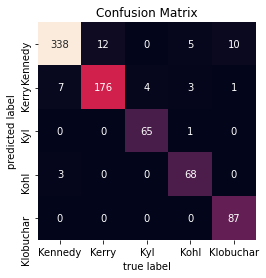

In [91]:
lucem_illud.plotConfusionMatrix(clf_naive_bayes, dfTest)

In [84]:
    # Analogizes
    # Linear
clf_linear.fit(np.stack(dfTrain_senate_large['vect'], axis=0), dfTrain_senate_large['category'])
lucem_illud.evaluateClassifier(clf_linear, dfTest_senate_large)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Kyl,0.001282,0.994737,1.000000,0.990756,0.989474
Klobuchar,0.006410,0.955357,1.000000,0.917125,0.910714
Kennedy,0.025641,0.975493,0.957865,0.950433,0.985549
Kerry,0.017949,0.974918,0.969849,0.941505,0.960199
Kohl,0.007692,0.974177,0.975000,0.932567,0.951220


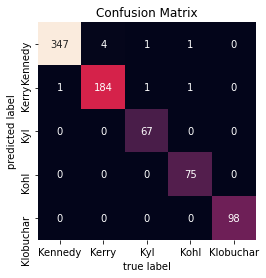

In [93]:
lucem_illud.plotConfusionMatrix(clf_linear, dfTest)

In [85]:
    # SVC - Support Vector Classifier
clf_svc.fit(np.stack(dfTrain_senate_large['vect'], axis=0), dfTrain_senate_large['category'])
lucem_illud.evaluateClassifier(clf_svc, dfTest_senate_large)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Kyl,0.066667,0.726316,1.000000,0.519298,0.452632
Klobuchar,0.034615,0.758929,1.000000,0.552473,0.517857
Kennedy,0.269231,0.755720,0.625926,0.621710,0.976879
Kerry,0.130769,0.769005,0.889764,0.613036,0.562189
Kohl,0.057692,0.736372,0.951220,0.507537,0.475610


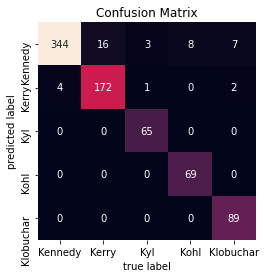

In [94]:
lucem_illud.plotConfusionMatrix(clf_svc, dfTest)

In [86]:
    # KNeighbors
clf_kneigh.fit(np.stack(dfTrain_senate_large['vect'], axis=0), dfTrain_senate_large['category'])
lucem_illud.evaluateClassifier(clf_kneigh, dfTest_senate_large)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Kyl,0.046154,0.837726,0.915493,0.664851,0.684211
Klobuchar,0.034615,0.849546,0.784314,0.580737,0.714286
Kennedy,0.192308,0.820743,0.716814,0.699442,0.936416
Kerry,0.151282,0.760060,0.778523,0.558271,0.577114
Kohl,0.055128,0.786236,0.842105,0.536529,0.585366


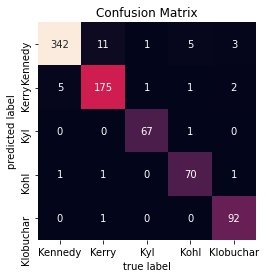

In [95]:
lucem_illud.plotConfusionMatrix(clf_kneigh, dfTest)

In [87]:
    # Symbolists
    # Decision Tree
clf_dtree.fit(np.stack(dfTrain_senate_large['vect'], axis=0), dfTrain_senate_large['category'])
lucem_illud.evaluateClassifier(clf_dtree, dfTest_senate_large)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Kyl,0.003846,0.988744,0.989362,0.971097,0.978947
Klobuchar,0.000000,1.000000,1.000000,1.000000,1.000000
Kennedy,0.003846,0.996251,0.994236,0.992645,0.997110
Kerry,0.000000,1.000000,1.000000,1.000000,1.000000
Kohl,0.000000,1.000000,1.000000,1.000000,1.000000


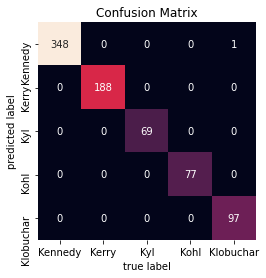

In [96]:
lucem_illud.plotConfusionMatrix(clf_dtree, dfTest)

In [88]:
    # Random Forest
clf_randomf.fit(np.stack(dfTrain_senate_large['vect'], axis=0), dfTrain_senate_large['category'])
lucem_illud.evaluateClassifier(clf_randomf, dfTest_senate_large)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Kyl,0.000000,1.000000,1.000000,1.000000,1.000000
Klobuchar,0.000000,1.000000,1.000000,1.000000,1.000000
Kennedy,0.003846,0.996544,0.991404,0.991404,1.000000
Kerry,0.002564,0.995025,1.000000,0.992614,0.990050
Kohl,0.001282,0.993902,1.000000,0.989087,0.987805


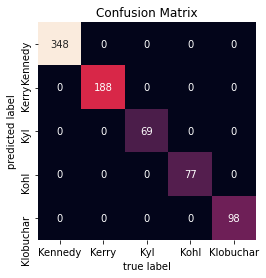

In [97]:
lucem_illud.plotConfusionMatrix(clf_randomf, dfTest)

In [89]:
    # Connectionists - Neural Network
clf_neural.fit(np.stack(dfTrain_senate_large['vect'], axis=0), dfTrain_senate_large['category'])
lucem_illud.evaluateClassifier(clf_neural, dfTest_senate_large)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Kyl,0.003846,0.984211,1.000000,0.972267,0.968421
Klobuchar,0.008974,0.937500,1.000000,0.883974,0.875000
Kennedy,0.039744,0.962235,0.933884,0.923965,0.979769
Kerry,0.034615,0.952324,0.939394,0.888521,0.925373
Kohl,0.010256,0.961982,0.974359,0.910757,0.926829


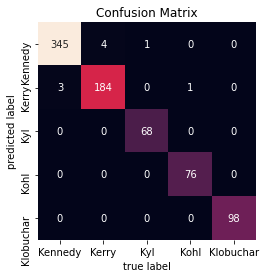

In [98]:
lucem_illud.plotConfusionMatrix(clf_neural, dfTest)

In [90]:
    # Ensemble - Gradient
clf_gradient.fit(np.stack(dfTrain_senate_large['vect'], axis=0), dfTrain_senate_large['category'])
lucem_illud.evaluateClassifier(clf_gradient, dfTest_senate_large)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Kyl,0.001282,0.994737,1.000000,0.990756,0.989474
Klobuchar,0.000000,1.000000,1.000000,1.000000,1.000000
Kennedy,0.002564,0.997696,0.994253,0.994253,1.000000
Kerry,0.000000,1.000000,1.000000,1.000000,1.000000
Kohl,0.001282,0.993902,1.000000,0.989087,0.987805


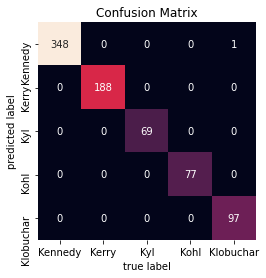

In [99]:
lucem_illud.plotConfusionMatrix(clf_gradient, dfTest)

Comments:
- Interestingly, the Naive Bayes does very well on the five categories randomly created, but very poorly on the five sennators.
- The Random Forest has the best predictive power. As the Confusion Matrix shows, it makes no mistakes in classifying the testing data.

# Clinton / Obama Press Releases

We often will not have nicely prepared data, so we will work though the proccess of cleaning and structuring in more detail here:

While the Clinton and Obama Senatorial Press Releases are not hand-coded, we can imagine that we have been given a stack of such press releases, but lost the metadata associated with which senatorial office issued which. If we label a few of them, how well can our classifier do at recovering the rest? 

In [101]:
ObamaClintonReleases = pandas.read_csv('../data/ObamaClintonReleases.csv', index_col=0)

I'm pretty sure that you're all familiar with pandas, but, just to clarify: why do we use pandas here? pandas is a Python library which is widely used for analyzing and wrangling data. In particular, pandas loads data and creates data frame, a Python object that looks familiar to us (since it looks like a excel table) and easy to work with. So, using pandas.read_csv function, we take in the csv file and convert it into a data frame. 

In [102]:
type(ObamaClintonReleases)

pandas.core.frame.DataFrame

It's a DataFrame! and it looks like this:

In [103]:
ObamaClintonReleases

,download_url,html_url,name,path,text,targetSenator
0,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Apr2007Obama430.txt,raw/Obama/10Apr2007Obama430.txt,Obama Calls on IRS to Protect Taxpayers ...,Obama
1,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Apr2008Obama108.txt,raw/Obama/10Apr2008Obama108.txt,Statement from Senator Barack Obama on the ...,Obama
2,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Aug2005Obama674.txt,raw/Obama/10Aug2005Obama674.txt,Obama Says Bill Will Help Cut Off Supply of...,Obama
3,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Aug2005Obama675.txt,raw/Obama/10Aug2005Obama675.txt,Obama Durbin Say Illinois Will Receive 33 ...,Obama
4,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Aug2006Obama508.txt,raw/Obama/10Aug2006Obama508.txt,Obama Introduces Bill to Help Tap Power of ...,Obama
...,...,...,...,...,...,...
1704,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,1Sep2005Clinton285.txt,raw/Clinton/1Sep2005Clinton285.txt,September 1 2005 Senator Clinton Visit Infoto...,Clinton
1705,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,1Sep2005Clinton286.txt,raw/Clinton/1Sep2005Clinton286.txt,September 1 2005 Senator Clinton Announces Ex...,Clinton
1706,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,1Sep2005Clinton287.txt,raw/Clinton/1Sep2005Clinton287.txt,September 1 2005 Senator Clinton Joins Local ...,Clinton
1707,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,1Sep2006Clinton207.txt,raw/Clinton/1Sep2006Clinton207.txt,September 1 2006 Clintons Meet with Cazenovia...,Clinton


Neat! Let's turn the 'targetSenator' column into a binary category variable.

In [104]:
ObamaClintonReleases['category'] = [s == 'Obama' for s in ObamaClintonReleases['targetSenator']]

Tokenize and normalize

In [105]:
ObamaClintonReleases['tokenized_text'] = ObamaClintonReleases['text'].apply(lambda x: lucem_illud.word_tokenize(x))
ObamaClintonReleases['normalized_text'] = ObamaClintonReleases['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x))

Let's split the data into training data and testing data.

In [106]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud.trainTestSplit(ObamaClintonReleases, holdBackFraction=holdBackFraction)

In [107]:
print(len(train_data_df))
print(len(test_data_df))

1368
341


## Logistic Regression

First, let's try with a logistic regression, which may be familiar to you from statistical methods classes. First, we must turn the training dataset into a tf-idf matrix (`lucem_illud.generateVecs()` will help with this but for now we are doing it the long way):

In [108]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['text'])

The core function here is TfidfVectorizer, which takes a collection of raw documents and turn them to a tf-idf matrix. Just to recap: tf-idf means term frequency-inverse document frequency, a statistic (or, more precisely, a product of two statistics, term frequency and inverse document frequency) that shows the importance of a term vis-a-vis documents. TF, or, term frequency, counts how many times a term is used in a document; IDF, or, inverse-document-frequency, measures common or rare a term appears across documents. 

Let's look at three parameters of TfidfVectorizer: max_df = 100, min_df = 2, and norm='l2'. What do those parameters mean? 

(1) max_df = 100

Here, we specified a thredhold of 100, and the terms that have a document frequency higher than 100 would be ignored.

(2) min_df = 2

We specified a lower bound, 2, and the terms that have a document frequency lower than 2 will be ignored.

(3) norm = 'l2'

This parameter is about vector normalization. In machine learning, we commonly normalize vectors, i.e., change the length of vectors and turn them into a unit vector, before passing them into algorithms. There are various ways of normalizations, and this parameter specifies how we normalize vectors. Here, we set the norm to l2, in which case, we normalize the vectors such that squares of vector elements sums to 1. Alternatively, we can set it to l1, in which case the sum of absolute values of vector elements, not the square of vector elements, is 1. 

fit_transform() literally fits to data and then transform it. So, fit_transform() is just a combination of two steps--(1) fitting parameters to data; (2) then, using the vocabulary and document frequencies learned by fit(), transforming documents into document-term matrix. So, it's the same as fit followed by transform. 

Note that we can use the CountVectorizer instead, which simply produces a matrix of word counts.

In [109]:
TFVects.shape

(1368, 11428)

We can save this in the dataframe to make things easier

In [110]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

Looks simple, but we need to know what todense() does here. todense() returns a dense matrix representation of the matrix. Why do we need this? As you can see above, the TFVects, a document-term matrix, has 11349 columns, and this matrix is sparse, in the sense that it is comprised mostly of zeros. Dense matrices, in contrast, are the matrices that are comprised of mostly non-zeros. Then why do we make sparse matrices into dense ones? Because **zero values don't contain important information but take up so much memory.**

In a regression, we cannot have more variables than cases. So, we need to first do a dimension reduction. First, we will approah this with PCA. You have previously seen this in week 3. Here we are not concerned about visualization, but rather classification and so all principal components are calculated. Watch out: we have to use `stack` not `sum` for combining the vectors. We note that you could also use topic loading and embedding dimensions as featured variables.

In [111]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))

We can store the PCA space vectors in the dataframe too:

In [112]:
train_data_df['pca'] = [r for r in reduced_data]

Visualization in 2D:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


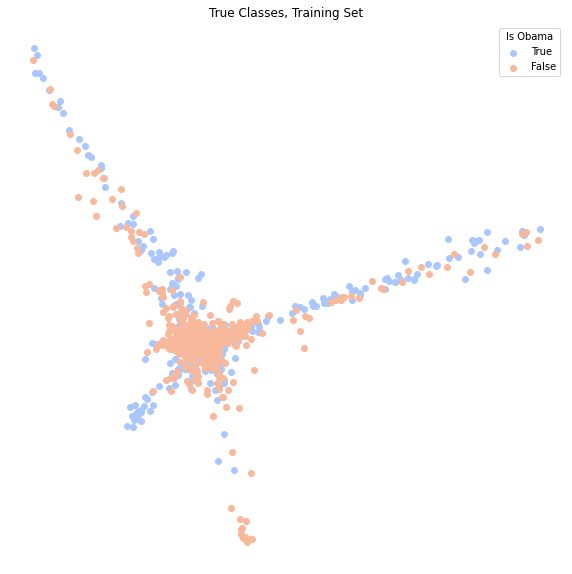

In [237]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot Obama
a = np.stack(train_data_df[train_data_df['category']==True]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot not Obama
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Obama')
plt.title('True Classes, Training Set')
plt.show()

PCA cannot distinguish Obama very well. Let's perform a screeplot to see how many Principal Components we need.

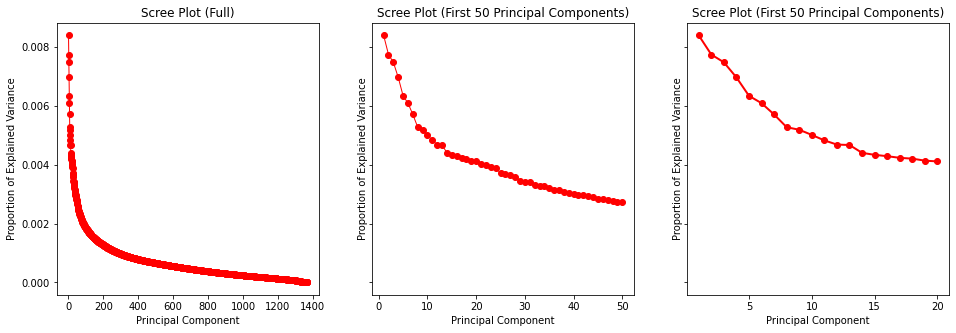

In [114]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

Let's choose the first 10 pricipal components as our covariates.

In [115]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

Now we fit a logistic regression to our data.

In [116]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

LogisticRegression()

Let's see how the logistic regression performs on the training dataset from which we develop the model. Unfortunately, the mean accuracy is only about 64%.

In [117]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

0.6608187134502924

How does it perform on the testing dataset, which we "held out" and did not use for model training? We need to repeat all the steps on the testing data, but without retraining:

In [118]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

0.6627565982404692

Slightly poorer. How about using more dimensions (40)?

In [119]:
train_data_df['pca_reduced_40'] = train_data_df['pca'].apply(lambda x: x[:40])
test_data_df['pca_reduced_40'] = test_data_df['pca'].apply(lambda x: x[:40])

logistic.fit(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_40'], axis=0), test_data_df['category']))

Training:
0.7309941520467836
Testing:
0.7243401759530792


Or still more (100)?

In [120]:
train_data_df['pca_reduced_100'] = train_data_df['pca'].apply(lambda x: x[:100])
test_data_df['pca_reduced_100'] = test_data_df['pca'].apply(lambda x: x[:100])

logistic.fit(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_100'], axis=0), test_data_df['category']))

Training:
0.8252923976608187
Testing:
0.8035190615835777


Or even more (200)!

In [121]:
train_data_df['pca_reduced_200'] = train_data_df['pca'].apply(lambda x: x[:200])
test_data_df['pca_reduced_200'] = test_data_df['pca'].apply(lambda x: x[:200])

logistic.fit(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_200'], axis=0), test_data_df['category']))

Training:
0.8742690058479532
Testing:
0.8240469208211144


This is becoming ridiculous (400)!

In [122]:
train_data_df['pca_reduced_400'] = train_data_df['pca'].apply(lambda x: x[:400])
test_data_df['pca_reduced_400'] = test_data_df['pca'].apply(lambda x: x[:400])

logistic.fit(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_400'], axis=0), test_data_df['category']))

Training:
0.9049707602339181
Testing:
0.8211143695014663


Increasing the number of covariates would overfit our data, and it seems that using a logistic regression, our prediction accuracy is at best about 65%. We can, however, try a logistic regression that uses the TF-IDF scores for each word, but with an L1 regularization or L1-norm loss function, which is also known as least absolute deviations (LAD), least absolute errors (LAE) or L1 penalty. It minimizes the sum of the absolute differences (S) between the target value ($Y_i$) and the estimated values ($f(x_i)$) and prunes all insignificant variables (i.e., word TF-IDF scores):

$S=\sum^n_{i=1}|y_i=f(x_i)|$

The result is a model retaining only the most individually significant features.

In [123]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

0.9568713450292398


Train the model using training data, and then test it on the testing data.

In [124]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

0.8357771260997068


81% accuracy seems like the best we can get by using a logistic regression.

Now let's try with Naive Bayes. Classically, it is trained with word counts, but TF-IDF vectors are also quite good:

In [125]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

BernoulliNB()

In [126]:
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training:
0.9685672514619883
Testing:
0.8768328445747801


A bit better than the logit, but that's just looking at the accuracy. What about other measures? Let's first save the predictions in the dataframe to save use rerunning the model every time:

In [127]:
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

Precision:

In [128]:
sklearn.metrics.precision_score(test_data_df['category'], test_data_df['nb_predict'])

0.8482758620689655

Recall:

In [129]:
sklearn.metrics.recall_score(test_data_df['category'], test_data_df['nb_predict'])

0.8601398601398601

F1-measure:

In [130]:
sklearn.metrics.f1_score(test_data_df['category'], test_data_df['nb_predict'])

0.8541666666666667

Let's take a look at how well our posterior distribution looks relative to the truth.

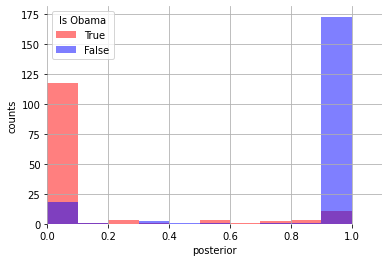

In [131]:
fig, ax = plt.subplots()
ax.grid(False)
ax.set_frame_on(False)
test_data_df[test_data_df['category'].eq(True)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'True', color = 'red')
test_data_df[test_data_df['category'].eq(False)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'False', color = 'blue')
ax.set_xlim((0,1.1))
ax.legend(title = "Is Obama")
ax.set_xlabel('posterior')
ax.set_ylabel('counts')
plt.show()

The classification is suprisingly accurate. We can even look at what words are most influential with a bit of simple math:

In [132]:
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'Obama' : [],
    'Obama_log_prob' : [],
    'Clinton' : [],
    'Clinton_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Obama'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Obama_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Clinton'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Clinton_log_prob'].append(prob)
    
pandas.DataFrame(words_dict)

,Obama,Obama_log_prob,Clinton,Clinton_log_prob
0,signature,-2.167811,amy,-1.853485
1,island,-2.282880,monday,-1.876213
2,welcomed,-2.307573,dick,-1.911305
3,announcement,-2.320151,brundage,-1.960095
4,awarded,-2.332890,temporary,-2.093626
5,ground,-2.332890,chicago,-2.108015
6,urban,-2.399140,reform,-2.214987
7,honor,-2.412933,location,-2.247777
8,read,-2.412933,cases,-2.334788
9,created,-2.426919,writing,-2.334788


## Multinomial Naive Bayes

What if we want to classify our text into one of *many* classes? The multinomial Naive Bayes generating model assumes that document features (e.g., words) are generated by draws from a multinomial distribution (recall this gives the probability to observe a particular pattern of counts across features). 

Let's use again the dataset we used in week 3, the 20 newsgroup dataset.

In [133]:
newsgroups = sklearn.datasets.fetch_20newsgroups(data_home = '../data') #Free data to play with: documents from a newsgroup corpus.
newsgroups.target_names #Possible categories, i.e., the newsgroups

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

We can pick specific categories, and pull the relevant training and testing sets. 

In [134]:
target_categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics'] #Can change these of course

newsgroupsDF = pandas.DataFrame(columns = ['text', 'category', 'source_file'])
for category in target_categories:
    print("Loading data for: {}".format(category))
    ng = sklearn.datasets.fetch_20newsgroups(categories = [category], remove=['headers', 'footers', 'quotes'], data_home = '../data')
    newsgroupsDF = newsgroupsDF.append(pandas.DataFrame({'text' : ng.data, 'category' : [category] * len(ng.data), 'source_file' : ng.filenames}), ignore_index=True)

Loading data for: talk.religion.misc
Loading data for: soc.religion.christian
Loading data for: sci.space
Loading data for: comp.graphics


Now we need to tokenize, and make a training and testing set:

In [136]:
newsgroupsDF['tokenized_text'] = newsgroupsDF['text'].apply(lambda x: lucem_illud.word_tokenize(x))
newsgroupsDF['normalized_text'] = newsgroupsDF['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x))

In [137]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

In [138]:
print(len(train_ng_df))
print(len(test_ng_df))

1723
430


We need to extract features from the text. We can use built-in feature extraction to do so. We will use a tf-idf vectorizer, which converts the document into a vector of words with tf-idf weights (term-frequency inverse-document frequency). This gives high weight to words that show up a lot in a given document, but rarely across documents in the corpus (more distinctive). 

In [139]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

Now we can train the model:

In [140]:
MultinomialNB_ng = sklearn.naive_bayes.MultinomialNB()
MultinomialNB_ng.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

MultinomialNB()

...and save predictions to the dataframe:

In [141]:
train_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(train_ng_df['vect'], axis=0))
print("Training score:")
print(MultinomialNB_ng.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))

Training score:
0.8903076030179918


In [142]:
train_ng_df[['category', 'nb_predict']][:10]

,category,nb_predict
1595,comp.graphics,comp.graphics
4,talk.religion.misc,talk.religion.misc
1303,sci.space,sci.space
620,soc.religion.christian,soc.religion.christian
685,soc.religion.christian,soc.religion.christian
1644,comp.graphics,comp.graphics
607,soc.religion.christian,soc.religion.christian
2150,comp.graphics,comp.graphics
1376,sci.space,sci.space
1045,sci.space,sci.space


Looks pretty good, lets examine the testing dataset:

In [144]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(MultinomialNB_ng.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.786046511627907


We can even use a confusion matrix, like we used last week for evaluating human coders relative to one another. Now we are evaluating our classifier relative to human coding. We'll just use the one in `lucem_illud_2020`, which requres a classifier and a dataframe with `'vect'` and `'category'` columns, like we have in the examples:

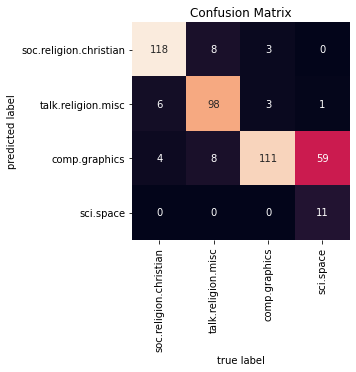

In [145]:
lucem_illud.plotConfusionMatrix(MultinomialNB_ng, test_ng_df)

Let's calculate the precision, recall, and F-measures.

In [147]:
print(sklearn.metrics.precision_score(test_ng_df['category'], test_ng_df['nb_predict'], average = 'weighted')) #precision
print(sklearn.metrics.recall_score(test_ng_df['category'], test_ng_df['nb_predict'], average = 'weighted')) #recall
print(sklearn.metrics.f1_score(test_ng_df['category'], test_ng_df['nb_predict'], average = 'weighted')) #F-1 measure

0.8439229270218995
0.786046511627907
0.7537391869417982


We can evaluate these per catagory. This has the same requiments as `plotConfusionMatrix`:

In [149]:
lucem_illud.metrics.evaluateClassifier(MultinomialNB_ng, test_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
talk.religion.misc,0.139535,0.577465,1.000000,0.294464,0.154930
sci.space,0.060465,0.914002,0.907407,0.817261,0.859649
comp.graphics,0.048837,0.942726,0.914729,0.866521,0.921875
soc.religion.christian,0.179070,0.860940,0.609890,0.592567,0.948718


We can also plot the ROC curves. This has the same requiments as `plotConfusionMatrix`:

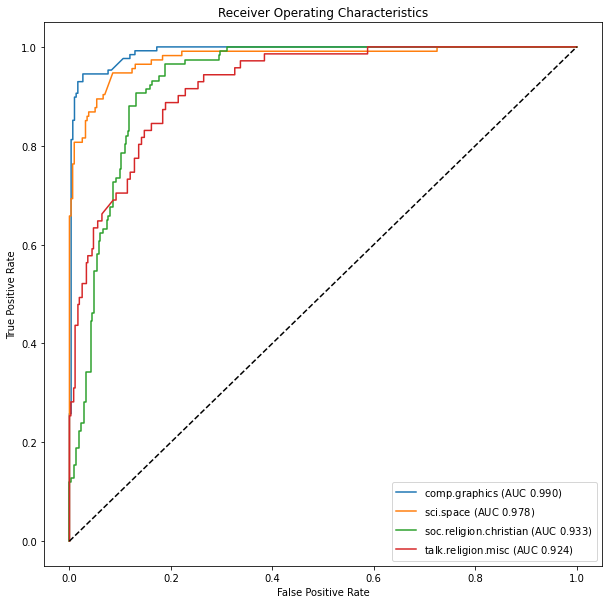

In [150]:
lucem_illud.plotMultiROC(MultinomialNB_ng, test_ng_df)

And we can plot the PCA space visualization:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

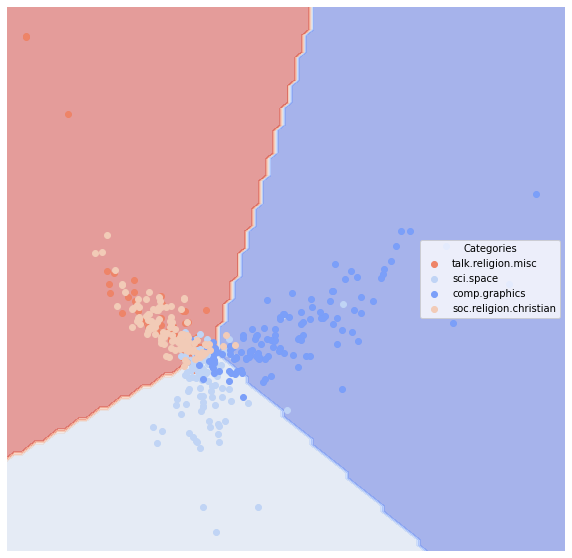

In [151]:
lucem_illud.plotregions(MultinomialNB_ng, test_ng_df)

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


In [152]:
df_twitter = pandas.read_csv('clean_data.csv')

/Users/nte/Documents/CCA2021/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,1,4,5,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [166]:
df_three_pol = df_twitter.loc[df_twitter['username'].isin(['Gustavo Petro', 
                                                            'Pacho Santos', 
                                                            'Germán Vargas Lleras'])]

(136030, 22)

In [251]:
df_three_pol = df_three_pol.sample(1000, random_state=987)

In [252]:
df_clean = df_three_pol[['username', 'text']]
df_clean = df_clean.rename(columns={"username": "category", "text": "text"})
df_clean.sample(5)

,category,text
258034,Gustavo Petro,Cómo Santiago de Chile se propone solucionar l...
181295,Germán Vargas Lleras,14 propuestas recibió @InviasOficial para cont...
509903,Germán Vargas Lleras,En .@hora20 hablaremos también del informe del...
528868,Gustavo Petro,El desconocimiento absoluto de la historia. Qu...
28958,Germán Vargas Lleras,"Comenzamos recorrido en Málaga, en el surorien..."


In [192]:
import spacy
nlp = spacy.load("es_core_news_sm")
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

In [177]:
def normalizeTokens(word_list, extra_stop=[]):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized

In [253]:
# Some text cleaning using regular expressions
import re
df_clean['text2'] = df_clean['text'].apply(lambda x: re.sub('[¡!@#$:).;,¿?&]', '', x.lower()))
df_clean['tokenized_text'] = df_clean['text2'].apply(lambda x: word_tokenize(x))
df_clean['normalized_text'] = df_clean['tokenized_text'].apply(lambda x: normalizeTokens(x))
df_clean.sample(5)

,category,text,text2,tokenized_text,normalized_text
257357,Gustavo Petro,Quedé sorprendido cuando se me criticó porque ...,quedé sorprendido cuando se me criticó porque ...,"[quedé, sorprendido, cuando, se, me, criticó, ...","[quedar, sorprender, criticar, decir, luchar, ..."
531063,Gustavo Petro,"@nicolasAmon mañana cierra el festival, la nov...",nicolasamon mañana cierra el festival la noven...,"[nicolasamon, mañana, cierra, el, festival, la...","[nicolasamon, mañana, cerrar, festival, 9, sin..."
261447,Gustavo Petro,"Versa sobre diez puntos democráticos, entre el...",versa sobre diez puntos democráticos entre ell...,"[versa, sobre, diez, puntos, democráticos, ent...","[verso, punto, democrático, lograr, relación, ..."
583540,Gustavo Petro,@johnsito1962 en el año 2012 se chatarrizo 160...,johnsito1962 en el año 2012 se chatarrizo 1600...,"[johnsito1962, en, el, año, 2012, se, chatarri...","[johnsito1962, año, chatarrizo, bus, y, contam..."
612010,Germán Vargas Lleras,"Y de #Cúcuta nos vinimos a Labateca, municipio...",y de cúcuta nos vinimos a labateca municipio q...,"[y, de, cúcuta, nos, vinimos, a, labateca, mun...","[y, cúcuta, venir, a, labateca, municipio, ben..."


In [254]:
holdBackFraction = .2
train_data, test_data = lucem_illud.trainTestSplit(df_clean, holdBackFraction=holdBackFraction)

In [255]:
print(len(train_data))
print(len(test_data))

800
200


In [256]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_data['text'])
train_data['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [257]:
train_data['vect'].sample(5)

360734    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
361114    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
562915    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
362126    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
9869      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: vect, dtype: object

In [258]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data['vect'], axis=0))

In [259]:
train_data['pca'] = [r for r in reduced_data]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


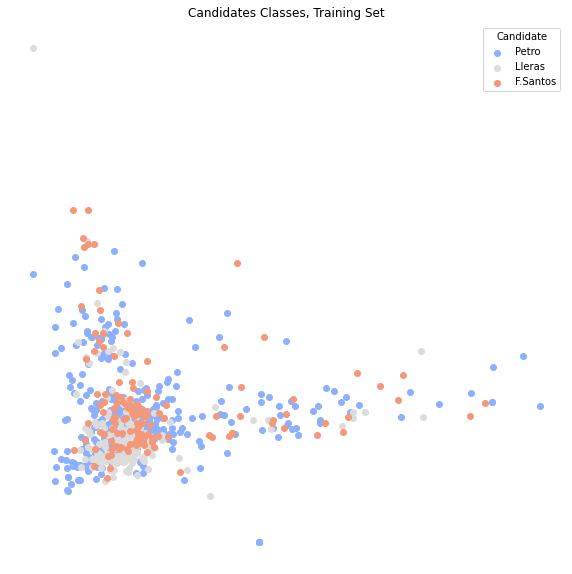

In [260]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 3)

#Plot Petro
a = np.stack(train_data[train_data['category']=="Gustavo Petro"]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "Petro")

#Plot Lleras
a = np.stack(train_data[train_data['category']=="Germán Vargas Lleras"]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "Lleras")

#Plot F.Santos
a = np.stack(train_data[train_data['category']=="Pacho Santos"]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[2], label = "F.Santos")
    
ax.legend(loc = 'upper right', title = 'Candidate')
plt.title('Candidates Classes, Training Set')
plt.show()

These candidates do not seem to be easily distinguishable.

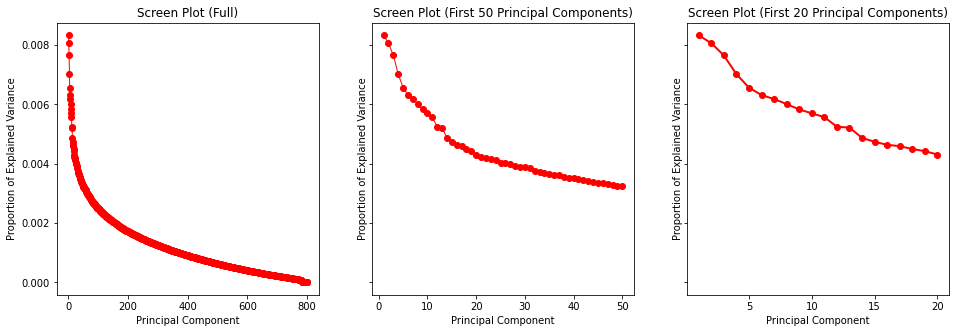

In [261]:
n = len(train_data)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Screen Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Screen Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Screen Plot (First 20 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

In [262]:
train_data['pca_reduced_10'] = train_data['pca'].apply(lambda x: x[:10])

In [263]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data['pca_reduced_10'], axis=0), train_data['category'])

LogisticRegression()

In [264]:
logistic.score(np.stack(train_data['pca_reduced_10'], axis=0), train_data['category'])

0.64875

In [266]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_data['text'])
test_data['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data['vect'], axis=0))
test_data['pca'] = [r for r in reduced_data_test]
test_data['pca_reduced_10'] = test_data['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data['pca_reduced_10'], axis=0), test_data['category'])

0.6

In [267]:
# Overfitting

train_data['pca_reduced_400'] = train_data['pca'].apply(lambda x: x[:400])
test_data['pca_reduced_400'] = test_data['pca'].apply(lambda x: x[:400])

logistic.fit(np.stack(train_data['pca_reduced_400'], axis=0), train_data['category'])

print("Training:")
print(logistic.score(np.stack(train_data['pca_reduced_400'], axis=0), train_data['category']))
print("Testing:")
print(logistic.score(np.stack(test_data['pca_reduced_400'], axis=0), test_data['category']))

Training:
0.845
Testing:
0.69


In [269]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data['vect'], axis=0), train_data['category'])

BernoulliNB()

In [270]:
print("Training:")
print(naiveBayes.score(np.stack(train_data['vect'], axis=0), train_data['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data['vect'], axis=0), test_data['category']))

Training:
0.88875
Testing:
0.72


In [272]:
test_data['nb_predict'] = naiveBayes.predict(np.stack(test_data['vect'], axis=0))
test_data['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data['vect'], axis=0))[:,0] #other is prop false

In [276]:
# Precision

sklearn.metrics.precision_score(test_data['category'], test_data['nb_predict'], average='weighted')

0.7202454760031471

In [277]:
# Recall

sklearn.metrics.recall_score(test_data['category'], test_data['nb_predict'], average='weighted')

0.72

In [278]:
# F1_score

sklearn.metrics.f1_score(test_data['category'], test_data['nb_predict'], average='weighted')

0.6660331576635925

# Decision Trees

Decision trees can be used to predict both categorical/class labels (i.e., classification) and continuous labels (i.e., regression).

In [ ]:
blobs_df = lucem_illud_2020.multiBlobs(noise=.2, centers=[(0,0), (0,5), (5,0), (-5,0), (0,-5)])
df_exampleTree_train, df_exampleTree_test = lucem_illud_2020.trainTestSplit(blobs_df)
lucem_illud_2020.plotter(df_exampleTree_train)

Now we import our Decision Tree classifier from sklearn.tree (familiar syntax) and fit it using the fit method.

In [ ]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])

To see what's going on visually with the classification: 

In [ ]:
lucem_illud_2020.plotregions(clf_tree, df_exampleTree_train)

In [ ]:
lucem_illud_2020.evaluateClassifier(clf_tree, df_exampleTree_test)

Lets look at accuracy:

In [ ]:
sklearn.metrics.accuracy_score(df_exampleTree_test['category'],clf_tree.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))

What happens if we trim the tree?

In [ ]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])
    score = sklearn.metrics.accuracy_score(df_exampleTree_test['category'], tree2.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

We can select different layers of the decision tree or "prune" it. At approximately four layers down in the decision tree, the shape is somewhat odd, suggesting that our model is overfitting beyond those four layers.

Combining multiple overfitting estimators turns out to be a key idea in machine learning. This is called **bagging** and is a type of **ensemble** method. The idea is to make many randomized estimators--each can overfit, as decision trees are wont to do--but then to combine them, ultimately producing a better classification. A **random forest** is produced by bagging decision trees.

In [ ]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [ ]:
bag.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category']) #Fit the bagged classifier

In [ ]:
lucem_illud_2020.plotregions(bag, df_exampleTree_test)

In [ ]:
lucem_illud_2020.evaluateClassifier(bag, df_exampleTree_test)

In [ ]:
lucem_illud_2020.plotConfusionMatrix(bag, df_exampleTree_test)

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

# K-Nearest Neighbors

The K-Nearest neighbors classifier takes a simpler premise than those before: Find the closest labeled datapoint in set and "borrow" its label.

Let's use newsgroup data again.

In [ ]:
newsgroupsDF[:5]

Make a testing and training set:

In [ ]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud_2020.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

Let's initialize our k-nearest neighbors classifier:

In [ ]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

Let's try to classify using the TF-IDF vectors:

In [ ]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [ ]:
clf_knearest.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

In [ ]:
lucem_illud_2020.evaluateClassifier(clf_knearest, train_ng_df)

And lets look at the testing data

In [ ]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = clf_knearest.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Let's produce another confusion matrix:

In [ ]:
lucem_illud_2020.plotConfusionMatrix(clf_knearest, test_ng_df)

You can produce the PCA space visual if you want, altough it can take a very long time, so we'll leave it optionally commented out:

In [ ]:
#lucem_illud_2020.plotregions(clf_knearest, test_ng_df)

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

# SVMs

Now we will examine Support Vector Machines, an approach that creates the partition that preserves the "maximum margin" between classes.

We will use a few sub forums from reddit--which tend to share text rather than memes--namely `talesfromtechsupport`, `badroommates`, `weeabootales` and `relationships`. The top 100 text posts from each have been saved to `data/reddit.csv`.

In [ ]:
redditDf = pandas.read_csv('../data/reddit.csv', index_col = 0)

#Drop a couple missing values

redditDf = redditDf.dropna()

#Set category

redditDf['category'] = redditDf['subreddit']

#tokenize and normalize
redditDf['tokenized_text'] = redditDf['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
redditDf['normalized_text'] = redditDf['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

We will tf.idf the data to make our vectors:

In [ ]:
redditTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, min_df=3, stop_words='english', norm='l2')
redditTFVects = redditTFVectorizer.fit_transform([' '.join(l) for l in redditDf['normalized_text']])
redditDf['vect'] = [np.array(v).flatten() for v in redditTFVects.todense()]

Initilize the model and make a train test split:

In [ ]:
holdBackFraction = .2
train_redditDf, test_redditDf = lucem_illud_2020.trainTestSplit(redditDf, holdBackFraction=holdBackFraction)

In [ ]:
clf_svm = sklearn.svm.SVC(kernel='linear', probability = False)
#probability = True is slower but  lets you call predict_proba()
clf_svm.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

...and consider the results:

In [ ]:
lucem_illud_2020.evaluateClassifier(clf_svm, test_redditDf)

In [ ]:
lucem_illud_2020.plotConfusionMatrix(clf_svm, test_redditDf)

In [ ]:
lucem_illud_2020.plotregions(clf_svm, test_redditDf)

# Neural Nets

We include an example of a simple neural network, the Multi-layer Perceptron (MLP) that learns a function $f(\cdot): R^m \rightarrow R^o$ by training on a dataset, where $m$ is the number of dimensions for input and $o$ is the number of dimensions for output. Given a set of features $X = {x_1, x_2, ..., x_m}$ and a target $y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. The following figure shows a one hidden layer MLP with scalar output. ![title](../data/multilayerperceptron_network.png) The leftmost layer, known as the input layer, consists of a set of "neurons" $\{x_i | x_1, x_2, ..., x_m\}$ representing the input features (e.g., weighted words). Each neuron in the hidden layer transforms the values from the previous layer with a weighted linear summation $w_1x_1 + w_2x_2 + ... + w_mx_m$, followed by a non-linear activation function $g(\cdot):R \rightarrow R$ - like the logistic or hyperbolic tan function. The output layer receives the values from the last hidden layer and transforms them into output values.

In [ ]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

In [ ]:
lucem_illud_2020.evaluateClassifier(clf_nn, test_redditDf)

In [ ]:
lucem_illud_2020.plotConfusionMatrix(clf_nn, test_redditDf)

In [ ]:
lucem_illud_2020.plotregions(clf_nn, test_redditDf)

It performs very well.

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?